In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =pd.read_excel("National_Accidents_Australia.xlsx")

In [3]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"ستون {column} دارای مقادیر: {unique_values}")


ستون Calendar year دارای مقادیر: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
ستون Month دارای مقادیر: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
ستون ABS remoteness area دارای مقادیر: ['Major Cities' 'Missing' 'Regional' 'Remote']
ستون Cause of injury دارای مقادیر: ['All other trauma events' 'Medical events' 'Non-traffic'
 'Other transport' 'Traffic' 'Unknown traffic']
ستون Age group دارای مقادیر: ['0-7' '17-25' '26-39' '40-64' '65-74' '75+' '8-16' 'Missing']
ستون Sex دارای مقادیر: ['Female' 'Male' 'intersex or indeterminate or missing']
ستون Road user دارای مقادیر: ['Not applicable' 'Car passenger' 'Car unknown position'
 'Heavy transport passenger' 'Pedal cyclist' 'Pedestrian' 'Motorcyclist'
 'Bus occupant' 'Car driver' 'Other or unknown'
 'Pick-up truck or van occupant' 'Heavy transport unknown position'
 'Heavy transport driver']
ستون Counterparty دارای مقادیر: ['Not applicable' 'Car, pick-up truck o

In [4]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [5]:
data.shape

(117919, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117919 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        117919 non-null  int64  
 1   Month                117919 non-null  object 
 2   ABS remoteness area  117919 non-null  object 
 3   Cause of injury      117919 non-null  object 
 4   Age group            117919 non-null  object 
 5   Sex                  117919 non-null  object 
 6   Road user            117919 non-null  object 
 7   Counterparty         117919 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             117919 non-null  int64  
 10  Died_cases           9741 non-null    float64
 11  Died_bed_days        10588 non-null   float64
 12  Hospitalisations     117919 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 11.7+ MB


In [7]:
data.describe()

,Calendar year,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
count,117919.000000,112982.000000,117919.000000,9741.000000,10588.000000,117919.000000
mean,2016.056140,913.243499,2367.263087,42.866851,382.356536,871.466948
std,3.143752,6227.102077,15855.439564,124.452898,1162.170382,6074.748945
min,2011.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2013.000000,1.000000,2.000000,1.000000,3.000000,1.000000
50%,2016.000000,3.000000,10.000000,2.000000,13.000000,2.000000
75%,2019.000000,12.000000,52.000000,11.000000,76.000000,11.000000
max,2021.000000,107434.000000,252872.000000,996.000000,9107.000000,107434.000000


In [8]:
data.drop_duplicates(inplace=True)
data.dropna(subset=['Count of cases', 'Died_cases', 'Died_bed_days'], how='all', inplace=True)


In [9]:
data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,April,Major Cities,All other trauma events,0-7,Female,Not applicable,Not applicable,765.0,1007,NaN,NaN,765
1,2011,April,Major Cities,All other trauma events,0-7,Male,Not applicable,Not applicable,1010.0,1694,NaN,NaN,1010
2,2011,April,Major Cities,All other trauma events,17-25,Female,Not applicable,Not applicable,859.0,1597,NaN,NaN,859
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113034 entries, 0 to 117918
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Calendar year        113034 non-null  int64  
 1   Month                113034 non-null  object 
 2   ABS remoteness area  113034 non-null  object 
 3   Cause of injury      113034 non-null  object 
 4   Age group            113034 non-null  object 
 5   Sex                  113034 non-null  object 
 6   Road user            113034 non-null  object 
 7   Counterparty         113034 non-null  object 
 8   Count of cases       112982 non-null  float64
 9   Bed days             113034 non-null  int64  
 10  Died_cases           9741 non-null    float64
 11  Died_bed_days        10588 non-null   float64
 12  Hospitalisations     113034 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 12.1+ MB


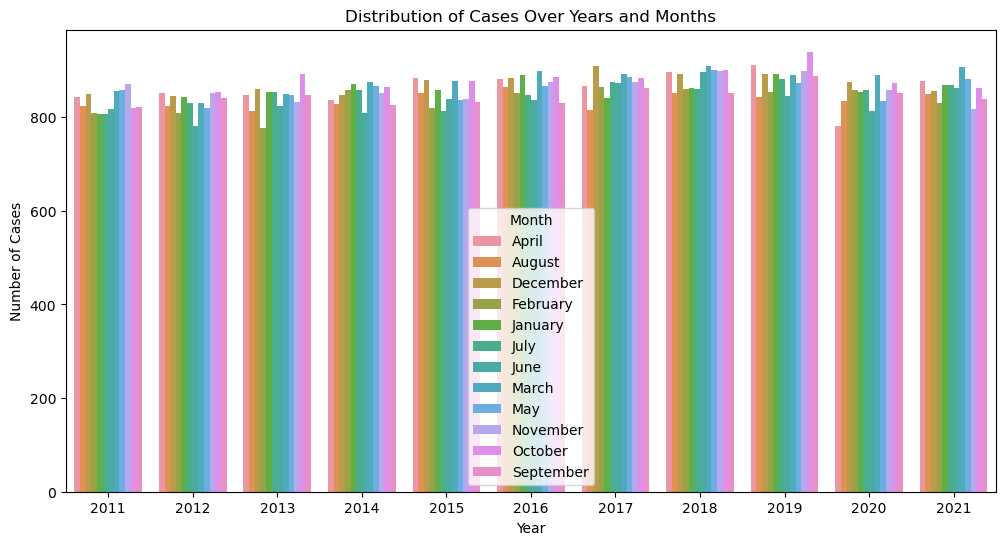

In [11]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Calendar year', hue='Month', data=data)
plt.title('Distribution of Cases Over Years and Months')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


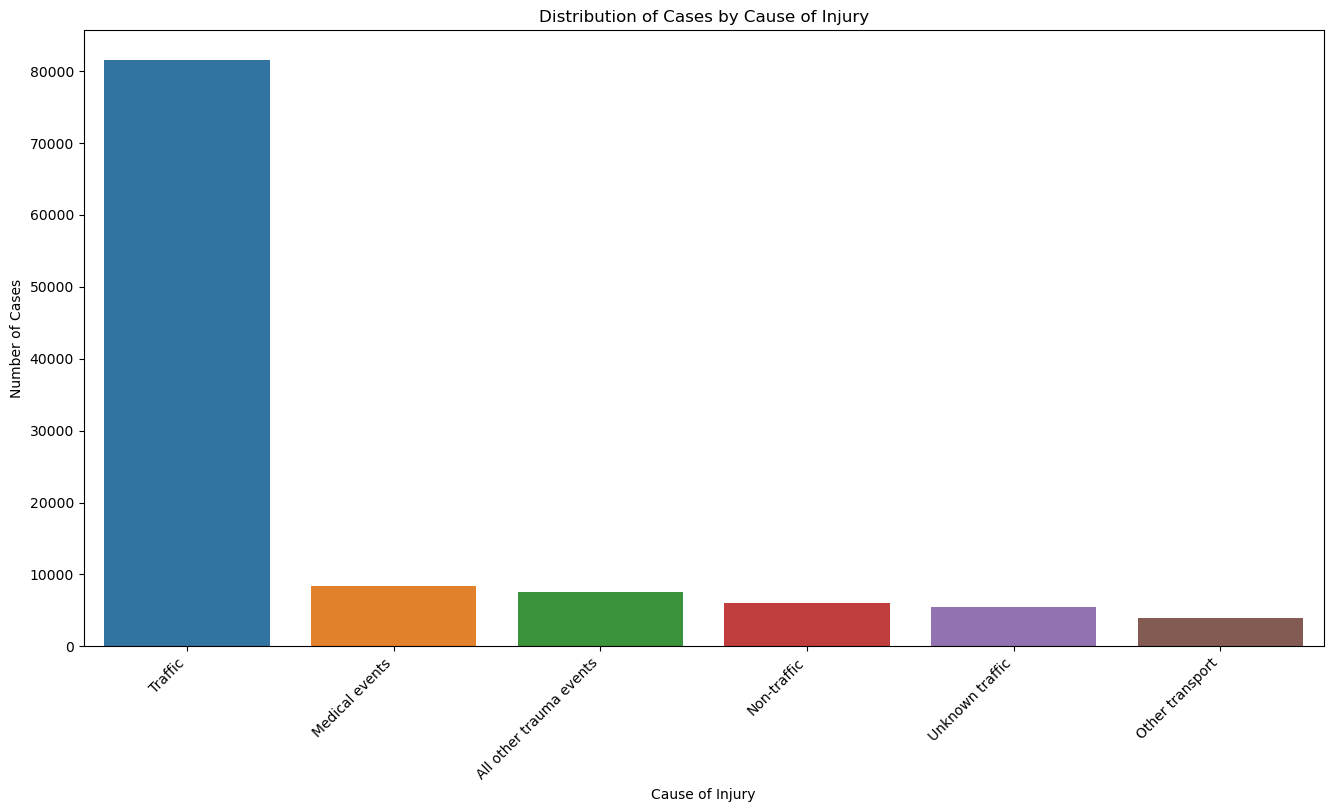

In [12]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Cause of injury', data=data, order=data['Cause of injury'].value_counts().index)
plt.title('Distribution of Cases by Cause of Injury')
plt.xlabel('Cause of Injury')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


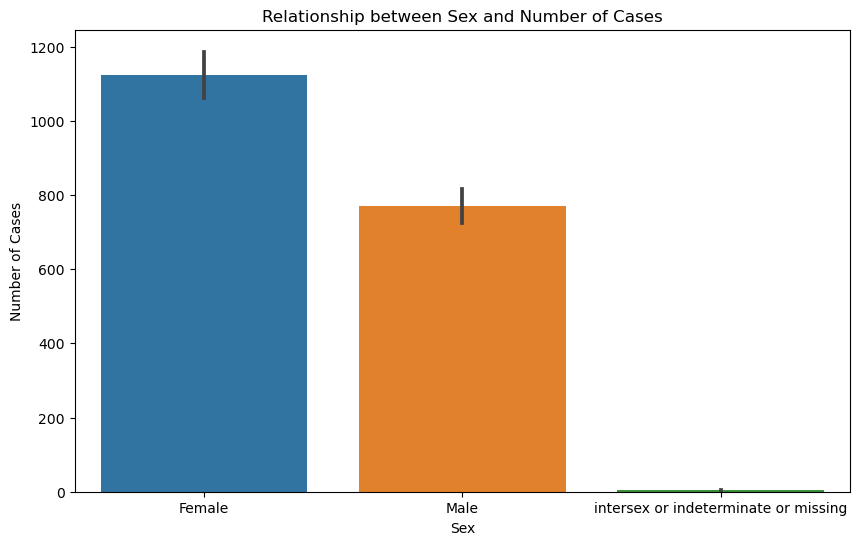

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Count of cases', data=data)
plt.title('Relationship between Sex and Number of Cases')
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.show()


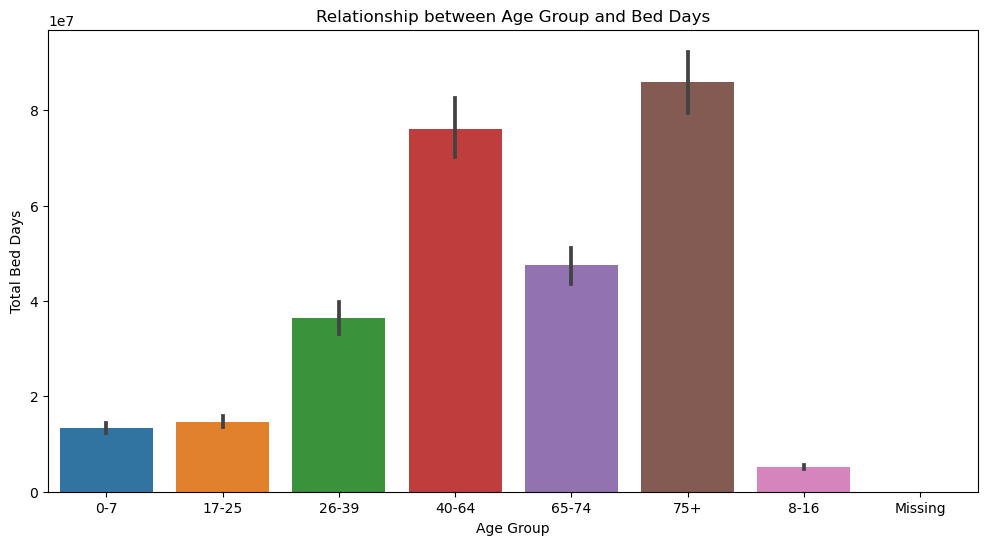

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age group', y='Bed days', data=data, estimator=sum)
plt.title('Relationship between Age Group and Bed Days')
plt.xlabel('Age Group')
plt.ylabel('Total Bed Days')
plt.show()


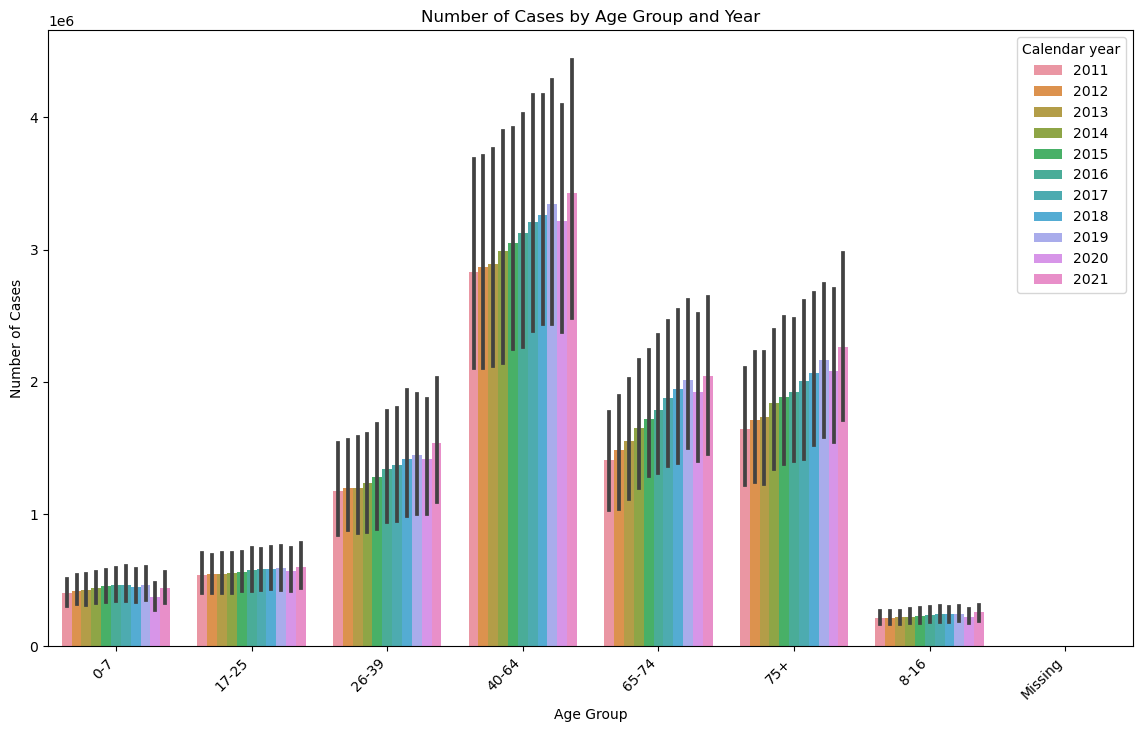

In [15]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Age group', y='Count of cases', hue='Calendar year', data=data, estimator=sum)
plt.title('Number of Cases by Age Group and Year')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')

plt.show()


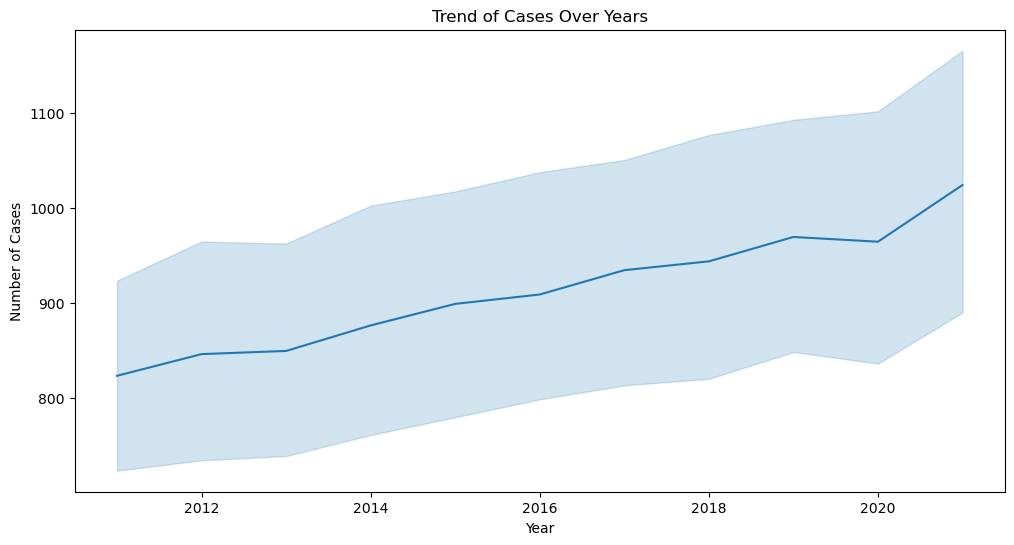

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Calendar year', y='Count of cases', data=data)
plt.title('Trend of Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


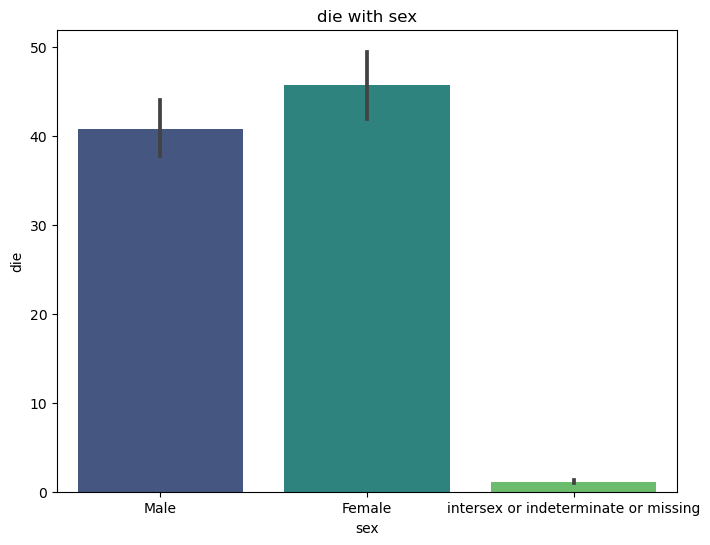

In [17]:

death_gender_data = data[['Sex', 'Died_cases']].dropna()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Died_cases', data=death_gender_data, palette='viridis')
plt.title('die with sex')
plt.xlabel('sex')
plt.ylabel('die')
plt.show()


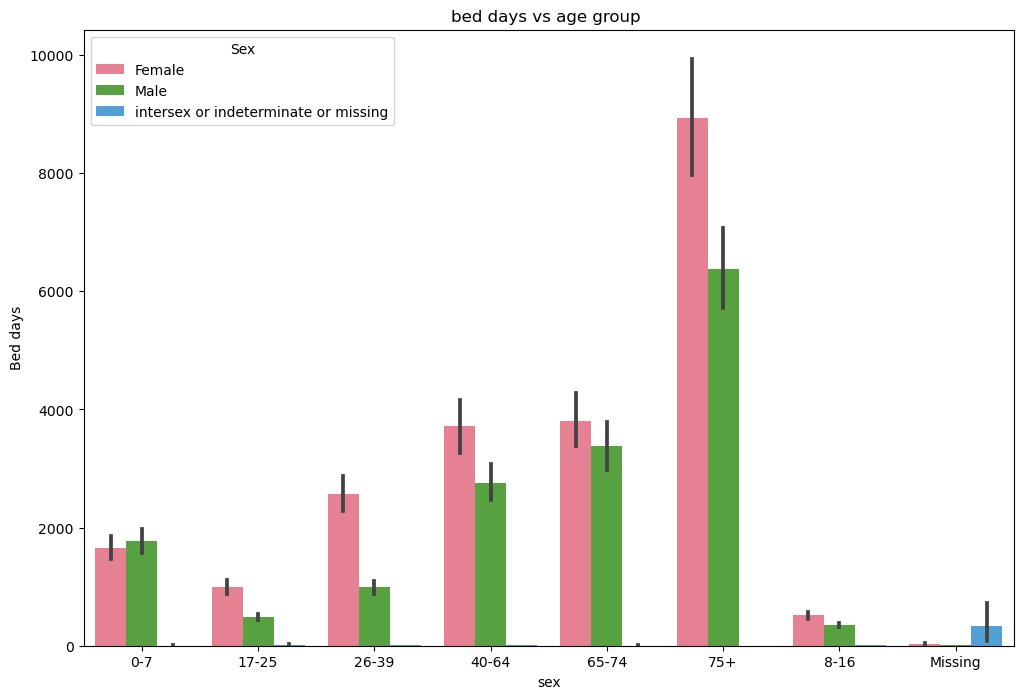

In [18]:

age_gender_data = data[['Age group', 'Sex', 'Bed days']].dropna()


plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Bed days', hue='Sex', data=age_gender_data, palette='husl')
plt.title('bed days vs age group ')
plt.xlabel('sex')
plt.ylabel('Bed days')
plt.show()


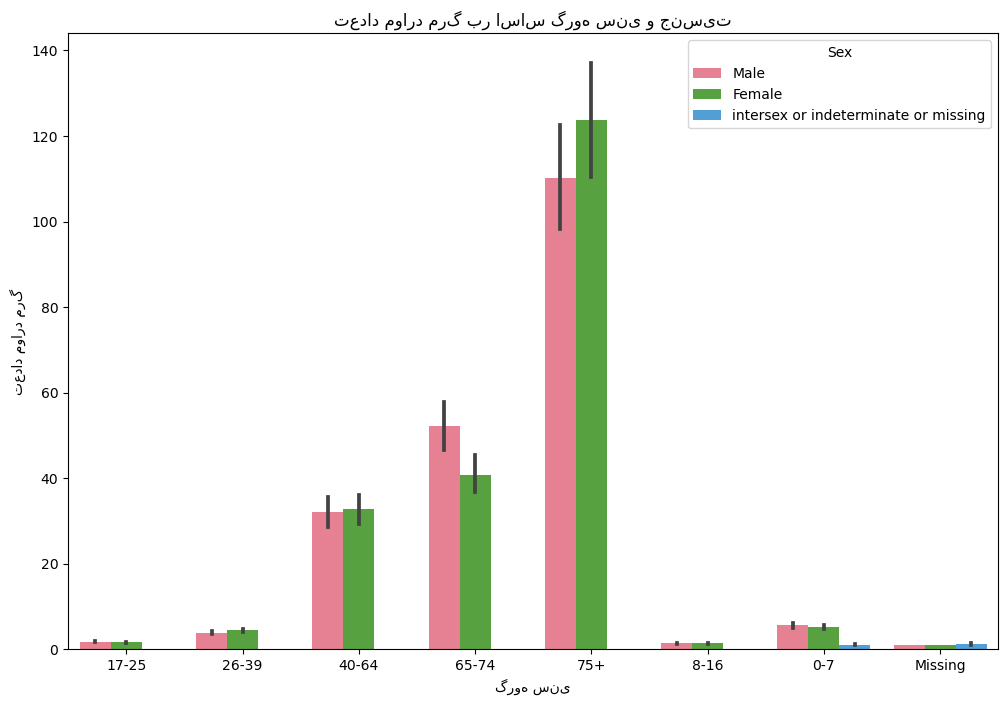

In [19]:

age_gender_data = data[['Age group', 'Sex', 'Died_cases']].dropna()

# تحلیل تعداد موارد مرگ بر اساس گروه سنی و جنسیت
plt.figure(figsize=(12, 8))
sns.barplot(x='Age group', y='Died_cases', hue='Sex', data=age_gender_data, palette='husl')
plt.title('تعداد موارد مرگ بر اساس گروه سنی و جنسیت')
plt.xlabel('گروه سنی')
plt.ylabel('تعداد موارد مرگ')
plt.show()


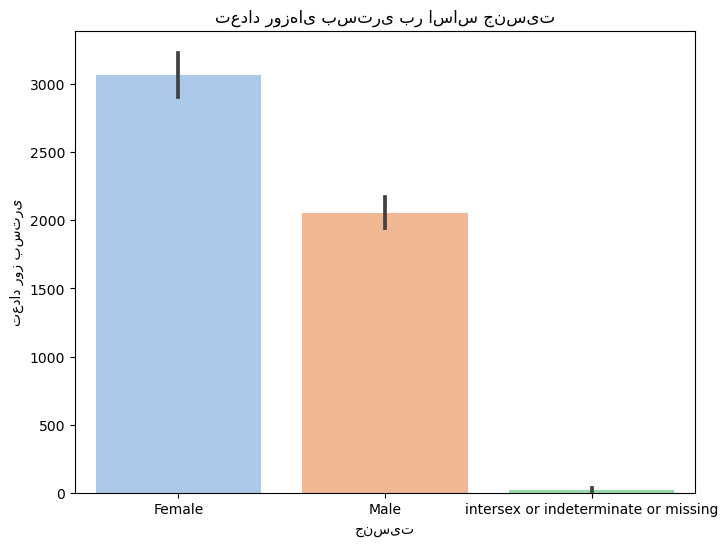

In [20]:
bed_days_gender_data = data[['Sex', 'Bed days']].dropna()

# تحلیل تعداد روزهای بستری بر اساس جنسیت
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Bed days', data=bed_days_gender_data, palette='pastel')
plt.title('تعداد روزهای بستری بر اساس جنسیت')
plt.xlabel('جنسیت')
plt.ylabel('تعداد روز بستری')
plt.show()


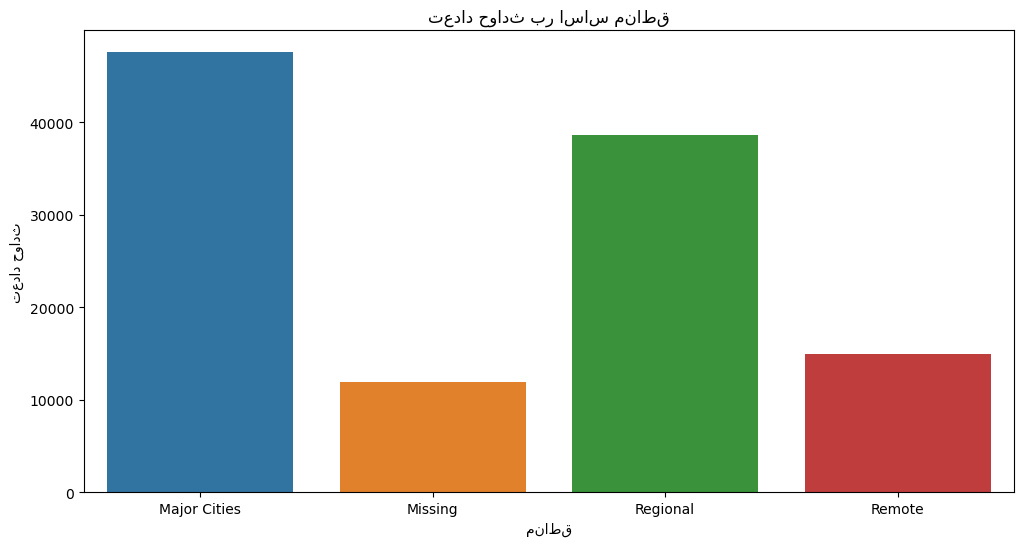

In [21]:


# تحلیل تعداد حوادث بر اساس مناطق
plt.figure(figsize=(12, 6))
sns.countplot(x='ABS remoteness area', data=data)
plt.title('تعداد حوادث بر اساس مناطق')
plt.xlabel('مناطق')
plt.ylabel('تعداد حوادث')
plt.show()


In [22]:
df_cleaned = data.dropna()



In [23]:
df_cleaned.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
3,2011,April,Major Cities,All other trauma events,17-25,Male,Not applicable,Not applicable,2231.0,3878,2.0,3.0,2229
4,2011,April,Major Cities,All other trauma events,26-39,Female,Not applicable,Not applicable,1098.0,2347,1.0,14.0,1097
5,2011,April,Major Cities,All other trauma events,26-39,Male,Not applicable,Not applicable,2339.0,4686,7.0,25.0,2332
6,2011,April,Major Cities,All other trauma events,40-64,Female,Not applicable,Not applicable,2060.0,6506,3.0,12.0,2057
7,2011,April,Major Cities,All other trauma events,40-64,Male,Not applicable,Not applicable,2688.0,8527,6.0,47.0,2682


In [24]:
df_cleaned.shape

(9741, 13)

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9741 entries, 3 to 104357
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calendar year        9741 non-null   int64  
 1   Month                9741 non-null   object 
 2   ABS remoteness area  9741 non-null   object 
 3   Cause of injury      9741 non-null   object 
 4   Age group            9741 non-null   object 
 5   Sex                  9741 non-null   object 
 6   Road user            9741 non-null   object 
 7   Counterparty         9741 non-null   object 
 8   Count of cases       9741 non-null   float64
 9   Bed days             9741 non-null   int64  
 10  Died_cases           9741 non-null   float64
 11  Died_bed_days        9741 non-null   float64
 12  Hospitalisations     9741 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 1.0+ MB


In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


label_encoder = LabelEncoder()
df_cleaned['Month'] = label_encoder.fit_transform(df_cleaned['Month'])
df_cleaned['ABS remoteness area'] = label_encoder.fit_transform(df_cleaned['ABS remoteness area'])
df_cleaned['Cause of injury'] = label_encoder.fit_transform(df_cleaned['Cause of injury'])
df_cleaned['Age group'] = label_encoder.fit_transform(df_cleaned['Age group'])
df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])
df_cleaned['Road user'] = label_encoder.fit_transform(df_cleaned['Road user'])
df_cleaned['Counterparty'] = label_encoder.fit_transform(df_cleaned['Counterparty'])




/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3517/855546203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = label_encoder.fit_transform(df_cleaned['Month'])
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3517/855546203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ABS remoteness area'] = label_encoder.fit_transform(df_cleaned['ABS remoteness area'])
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3517/855546203.py:9: SettingWit

In [27]:
df_cleaned.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097
5,2011,0,0,0,2,1,8,5,2339.0,4686,7.0,25.0,2332
6,2011,0,0,0,3,0,8,5,2060.0,6506,3.0,12.0,2057
7,2011,0,0,0,3,1,8,5,2688.0,8527,6.0,47.0,2682


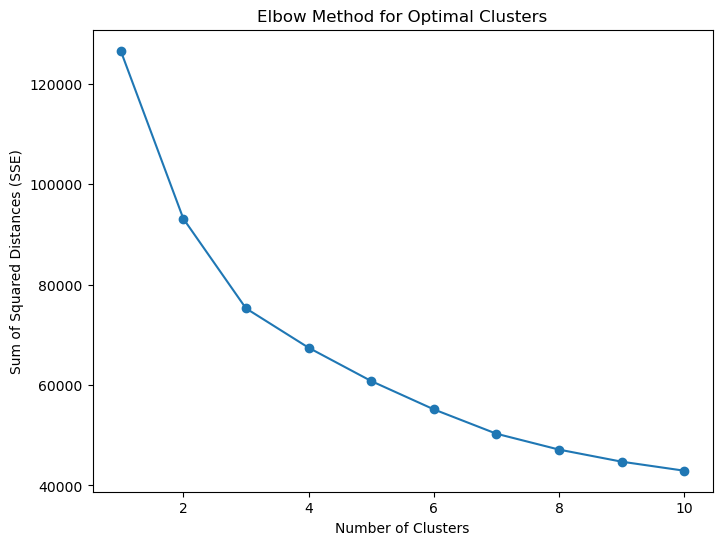

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# نمودار Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()


In [29]:
km= KMeans(n_clusters=3)
clusters=km.fit_predict(df_cleaned)
y = km.fit_predict(df_cleaned)
print(y[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 2 1 1 2 2 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 1 2 2 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 1
 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [30]:
unique_labels, counts = np.unique(y, return_counts=True)
for y, count in zip(unique_labels, counts):
    print(f"Cluster {y}: {count} samples")

Cluster 0: 7788 samples
Cluster 1: 633 samples
Cluster 2: 1320 samples


In [31]:
import pandas as pd


correlation_matrix = df_cleaned.corr()

print(correlation_matrix)


                     Calendar year     Month  ABS remoteness area  \
Calendar year             1.000000 -0.022559            -0.006105   
Month                    -0.022559  1.000000             0.003603   
ABS remoteness area      -0.006105  0.003603             1.000000   
Cause of injury          -0.035581 -0.003185            -0.147853   
Age group                 0.014260 -0.000059             0.010992   
Sex                      -0.000121 -0.007112            -0.022572   
Road user                 0.016044 -0.001189             0.014844   
Counterparty              0.023826  0.007123             0.157467   
Count of cases            0.044445  0.014634            -0.237141   
Bed days                  0.028908  0.014561            -0.245190   
Died_cases               -0.003342  0.005354            -0.149224   
Died_bed_days             0.006225  0.005330            -0.153388   
Hospitalisations          0.044672  0.014663            -0.237159   

                     Cause of inj